# Cucumber Profiling Results

### Sanitary Checks Stage

In [154]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [107]:
sanity_values = np.loadtxt("sanity_checks.values")
core_values = np.loadtxt("core.values")
init_client_values = np.loadtxt("init_client.values")
reposync_values = np.loadtxt("reposync.values")
secondary_values = np.loadtxt("secondary.values")
finishing_values = np.loadtxt("finishing.values")

every_value = np.loadtxt("all.values")

# Lables for time intervals
labels = ['t < 1', '1 < t < 5', '5 < t < 30', '30 < t < 60', '60 < t < 300', ' t > 300' ]
x_pos = np.arange(len(labels))

In [159]:
def value_repartition(current_array) :
    low_values = ((0 <= current_array) & (current_array < 1)).sum()
    med_low_values = ((1 <= current_array) & (current_array < 5)).sum()
    medium_values = ((5 <= current_array) & (current_array < 30)).sum()
    med_high_values = ((30 <= current_array) & (current_array < 60)).sum()
    high_values = ((60 <= current_array) & (current_array < 300)).sum()
    very_high_values = (300 <= current_array).sum()
    
    count_array = [low_values, med_low_values, medium_values, med_high_values, high_values, very_high_values]
    return count_array

def mean_values(current_array) :
    low_values = (current_array[(0 <= current_array) & (current_array < 1)]).mean()
    if np.isnan(low_values) : low_values = 0
    med_low_values = (current_array[(1 <= current_array) & (current_array < 5)]).mean()
    if np.isnan(med_low_values) : med_low_values = 0
    medium_values = (current_array[(5 <= current_array) & (current_array < 30)]).mean()
    if np.isnan(medium_values) : medium_values = 0
    med_high_values = (current_array[(30 <= current_array) & (current_array < 60)]).mean()
    if np.isnan(med_high_values) : med_high_values = 0
    high_values = (current_array[(60 <= current_array) & (current_array < 300)]).mean()
    if np.isnan(high_values) : high_values = 0
    very_high_values = (current_array[(300 <= current_array)]).mean()
    if np.isnan(very_high_values) : very_high_values = 0
    
    count_array = [low_values, med_low_values, medium_values, med_high_values, high_values, very_high_values]
    print(count_array)
    return count_array

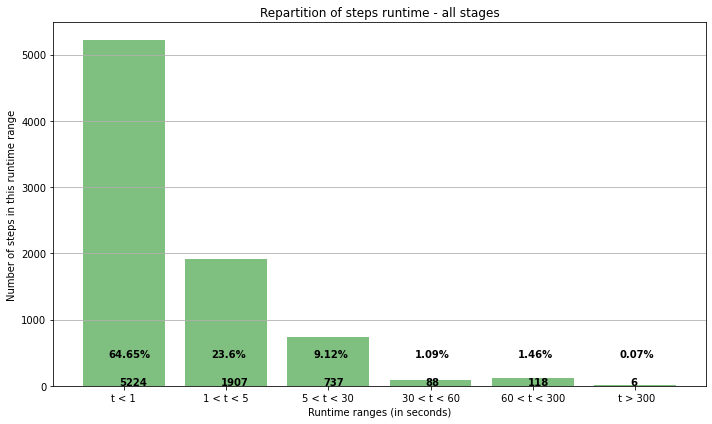

[0.31388512249234307, 1.9378619138437339, 10.421570475033922, 40.66468054318182, 113.87624769745761, 1059.6796190166667]


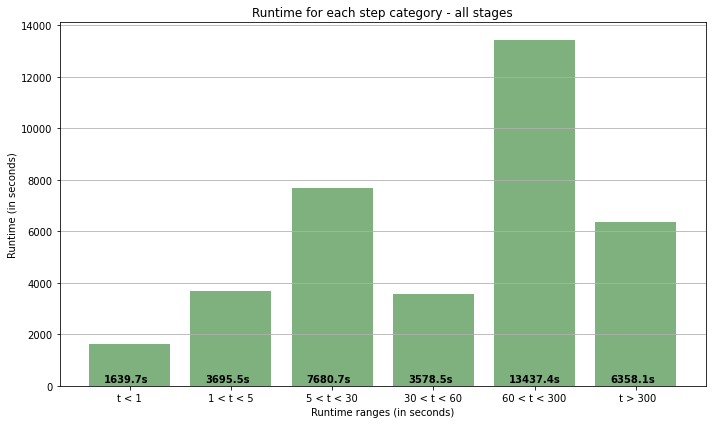

In [168]:
#All values 

# Array of values being currently worked on
current_array = every_value
total_values = current_array.size

# Compute the runtime repartition
occurences = value_repartition(current_array)

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='green')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - all stages')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_all_steps.png')
plt.show()

# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='darkgreen')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - all stages')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.75, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_all_runtimes.png')
plt.show()

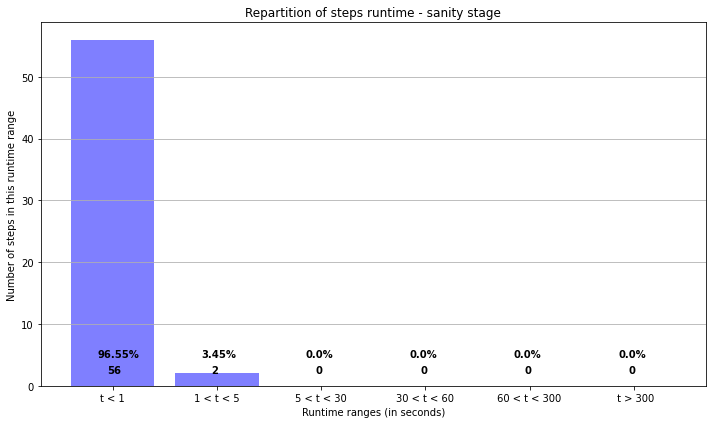

[0.379067125, 1.23577565, 0, 0, 0, 0]


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.


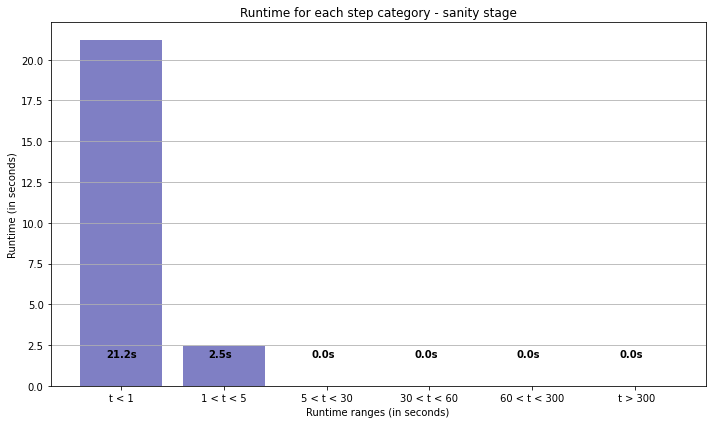

In [169]:
# Sanity stage

# Array of values being currently worked on
current_array = sanity_values
total_values = current_array.size

# Compute the runtime repartition
occurences = value_repartition(current_array)


fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='blue')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - sanity stage')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_sanity_stage.png')
plt.show()

# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='darkblue')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - sanity stage')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.85, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_sanity_runtimes.png')
plt.show()

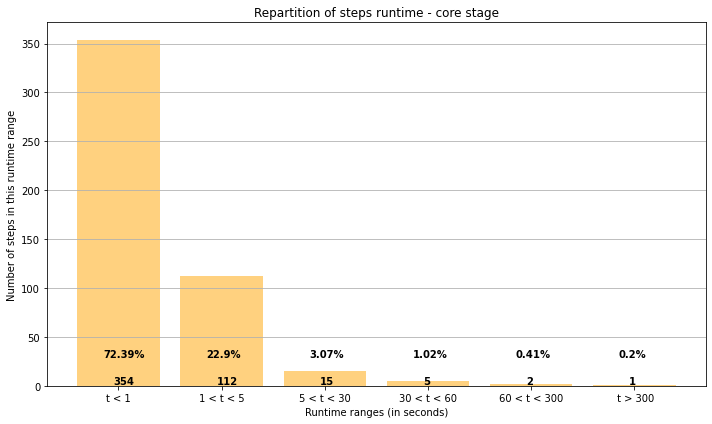

[0.3420858115819209, 1.7311183142857145, 10.7882002, 37.51675186, 120.53995044999999, 700.0005741]


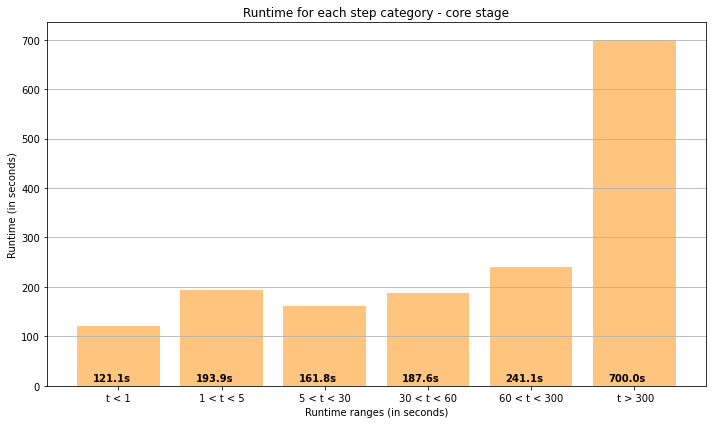

In [170]:
# Core stage

# Array of values being currently worked on
current_array = core_values
total_values = current_array.size

# Compute the runtime repartition
occurences = value_repartition(current_array)


fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='orange')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - core stage')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_core_stage.png')
plt.show()

# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='darkorange')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - core stage')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.75, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_core_runtimes.png')
plt.show()


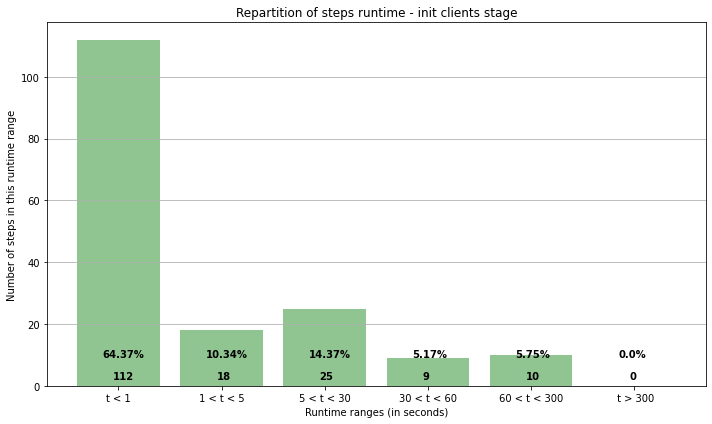

[0.3559921723214286, 2.203069661111111, 8.620451112000001, 46.530545833333335, 90.7391335, 0]


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.


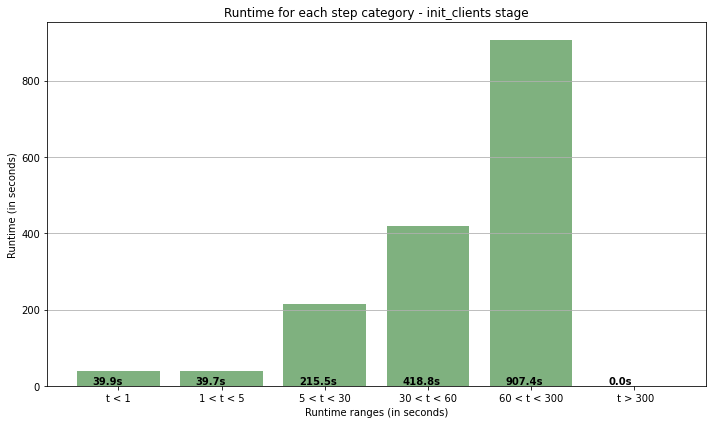

In [171]:
# Init client stage

# Array of values being currently worked on
current_array = init_client_values
total_values = current_array.size

# Compute the runtime repartition
occurences = value_repartition(current_array)


fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='forestgreen')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - init clients stage')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_init_clients_stage.png')
plt.show()

# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='darkgreen')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - init_clients stage')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.75, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_init_clients_runtimes.png')
plt.show()

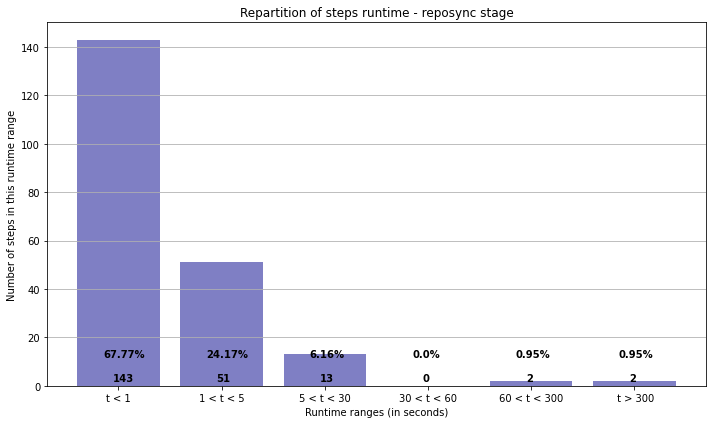

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.


[0.2556347881118881, 2.1785133549019604, 10.357902, 0, 71.63878109999999, 1169.26555925]


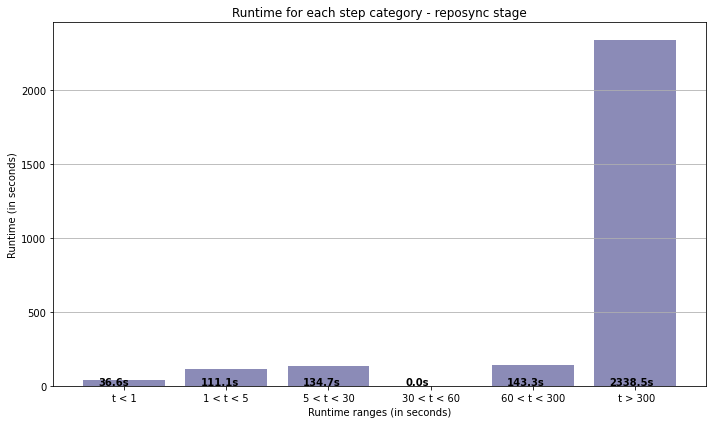

In [172]:
# Reposync stage

# Array of values being currently worked on
current_array = reposync_values
total_values = current_array.size

# Compute the runtime repartition
occurences = value_repartition(current_array)


fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='darkblue')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - reposync stage')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_reposync_stage.png')
plt.show()

# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='midnightblue')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - reposync stage')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.75, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_reposync_runtimes.png')
plt.show()

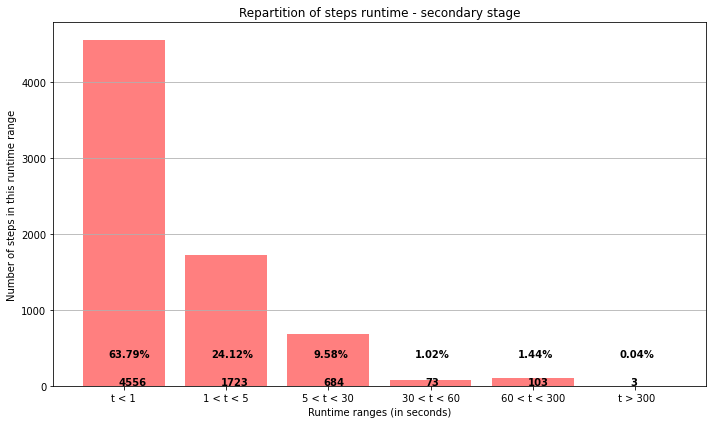

[0.3116521155399473, 1.9418471967498547, 10.480570808918129, 39.90892533835617, 115.77226557766988, 1106.5153404999999]


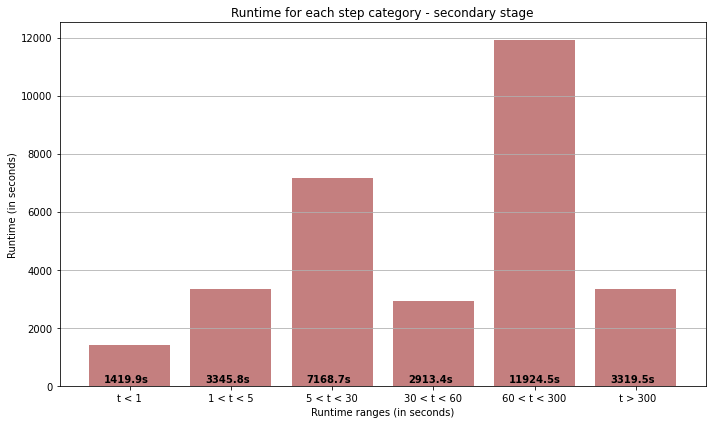

In [174]:
# Secondary stage

# Array of values being currently worked on
current_array = secondary_values
total_values = current_array.size

# Compute the runtime repartition
occurences = value_repartition(current_array)


fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='red')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - secondary stage')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_secondary_stage.png')
plt.show()


# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='darkred')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - secondary stage')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.75, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_secondary_runtimes.png')
plt.show()


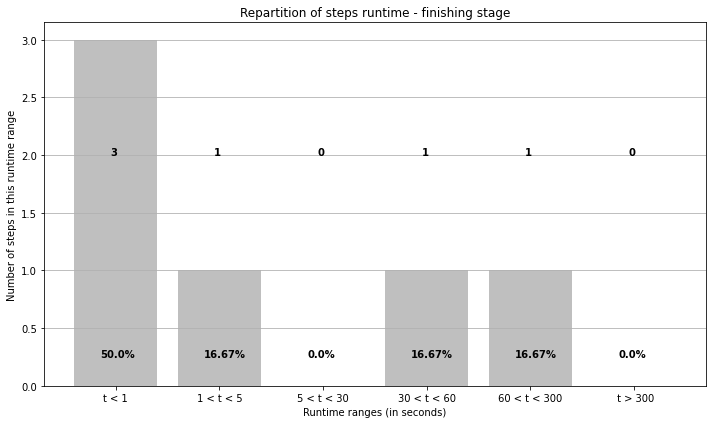

[0.36526906666666664, 2.5837122, 0, 58.7816663, 221.1050757, 0]


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.


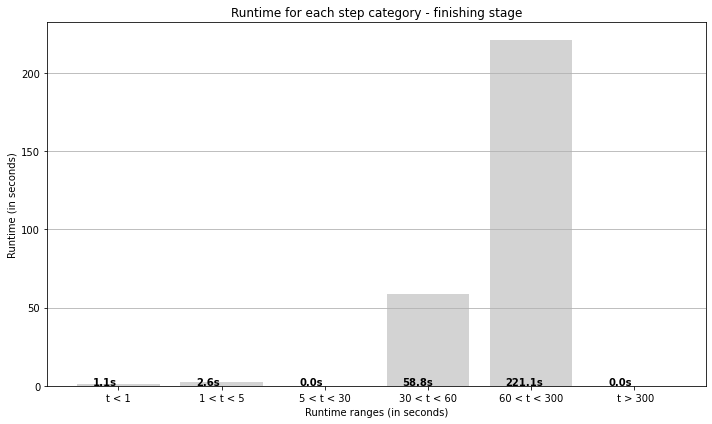

In [175]:
# Finishing stage

# Array of values being currently worked on
current_array = finishing_values
total_values = current_array.size

# Compute the runtime repartition
occurences = value_repartition(current_array)


fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x_pos, occurences, width=0.8, align='center', alpha=0.5, color='grey')
ax.set_ylabel('Number of steps in this runtime range')
ax.set_xlabel('Runtime ranges (in seconds)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Repartition of steps runtime - finishing stage')
ax.yaxis.grid(True)
for i, v in enumerate(occurences):
    ax.text((i-1) + 0.95, 2, str(v), color='black', fontweight='bold')
    ax.text((i-1) + 0.85, occurences[0]/12, str(round(100*v/total_values,2)) + '%', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_finishing_stage.png')
plt.show()

# Total runtimes

current_means = mean_values(current_array)
runtimes = np.multiply(current_means,occurences)

fig2, ax2 = plt.subplots(figsize = (10,6))

ax2.bar(x_pos, runtimes, width=0.8, align='center', alpha=0.5, color='darkgrey')
ax2.set_ylabel('Runtime (in seconds)')
ax2.set_xlabel('Runtime ranges (in seconds)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.set_title('Runtime for each step category - finishing stage')
ax2.yaxis.grid(True)
for i, v in enumerate(runtimes):
    ax2.text((i-1) + 0.75, runtimes[0]/12, str(round(v,1)) + 's', color='black', fontweight='bold')


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_finishing_runtimes.png')
plt.show()
